🐄 COMPLETE 3-CLASS CATTLE CLASSIFIER
📤 Step 1: Upload your cattle_dataset.zip file...


Saving cattle_dataset.zip to cattle_dataset.zip
✅ Uploaded: cattle_dataset.zip
📁 Dataset structure:
   Lumpy_cow: 123 images
   NON CATTLE IMAGES: 482 images
   healthy: 122 images

🔍 Step 2: Exploring 3-class dataset...
   Lumpy_cow: 123 images
   NON CATTLE IMAGES: 482 images
   healthy: 122 images
📈 Total images: 727

🔄 Step 3: Creating 3-class data generators...
Found 583 images belonging to 3 classes.
Found 144 images belonging to 3 classes.
✅ Classes: {'Lumpy_cow': 0, 'NON CATTLE IMAGES': 1, 'healthy': 2}
✅ Training samples: 583
✅ Validation samples: 144

🧠 Step 4: Creating 3-class MobileNetV2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ 3-class model created successfully!

🎯 Step 5: Training 3-class model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 48s 772ms/step - accuracy: 0.4303 - loss: 1.5103 - precision: 0.4307 - recall: 0.3753 - val_accuracy: 0.2847 - val_loss: 1.3048 - val_precision: 0.3222 - val_recall: 0.2014 - learning_rate: 1.0000e-04
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 377ms/step - accuracy: 0.5451 - loss: 1.2432 - precision: 0.5570 - recall: 0.4998 - val_accuracy: 0.5625 - val_loss: 0.9096 - val_precision: 0.6211 - val_recall: 0.4097 - learning_rate: 1.0000e-04
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 350ms/step - accuracy: 0.6549 - loss: 0.8675 - precision: 0.6767 - recall: 0.6222 - val_accuracy: 0.7639 - val_loss: 0.6658 - val_precision: 0.7863 - val_recall: 0.6389 - learning_rate: 1.0000e-04
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 343ms/step - accuracy: 0.6487 - loss: 0.9153 - precision: 0.6638 - recall: 0.6064 - val_accuracy: 0.7917 - val_loss: 0.5719 - val_precision: 0.8077 - val_recall: 0.7292 - learning_rate: 1.0000e-04
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 34

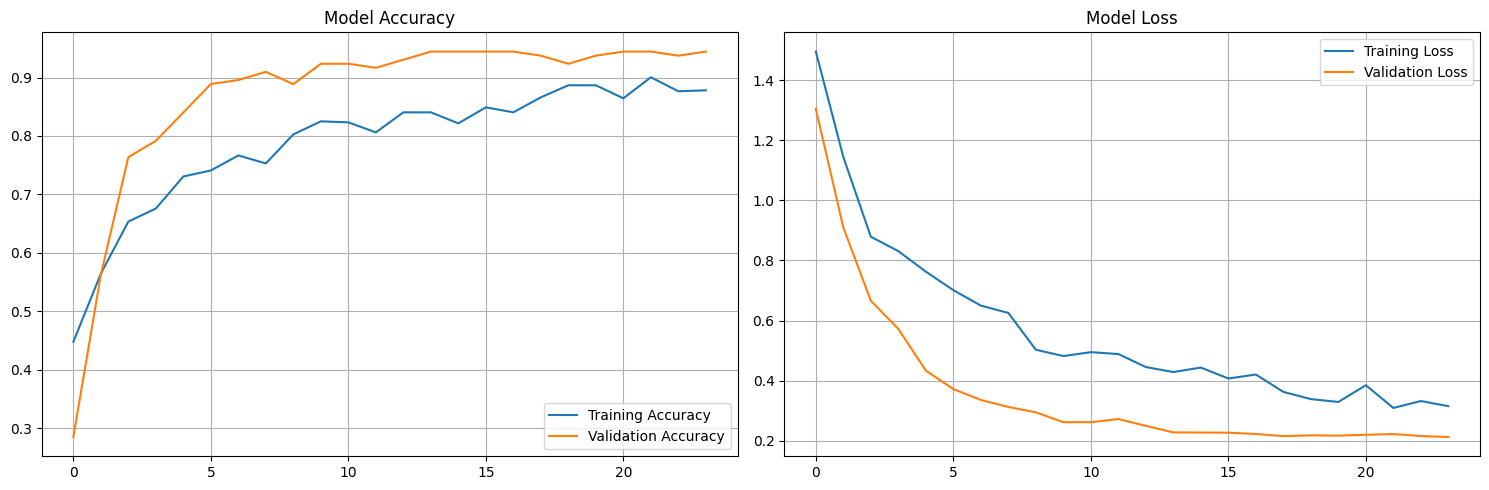

✅ Final Validation Accuracy: 0.9444

📈 Classification Report:
                   precision    recall  f1-score   support

        Lumpy_cow       0.88      0.92      0.90        24
NON CATTLE IMAGES       0.97      0.98      0.97        96
          healthy       0.91      0.83      0.87        24

         accuracy                           0.94       144
        macro avg       0.92      0.91      0.91       144
     weighted avg       0.94      0.94      0.94       144



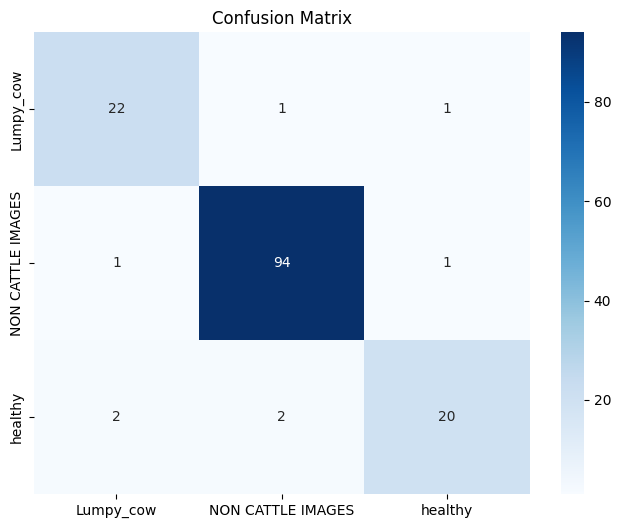


💾 Step 7: Saving model...
✅ Model saved as: cattle_3class_classifier.keras

🌐 Step 8: Creating web interface...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4cae1223028e2f0c43.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



🎉 COMPLETE! Your smart cattle classifier is ready!
✅ Uploads any image
✅ Validates if it's cattle
✅ Classifies healthy/lumpy
✅ Professional rejection of non-cattle images


In [ ]:
# ============================
# COMPLETE 3-CLASS CATTLE CLASSIFIER
# Upload → Train → Deploy with Cattle Validation
# ============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os
import zipfile
import shutil
from google.colab import files

print("🐄 COMPLETE 3-CLASS CATTLE CLASSIFIER")
print("=" * 50)

# ============================
# STEP 1: UPLOAD AND SETUP DATASET
# ============================

def upload_and_setup_dataset():
    """Upload your 3-class cattle dataset"""
    print("📤 Step 1: Upload your cattle_dataset.zip file...")

    # Upload zip file
    uploaded = files.upload()
    zip_filename = list(uploaded.keys())[0]
    print(f"✅ Uploaded: {zip_filename}")

    # Extract
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall('.')

    # Find dataset folder
    dataset_path = 'cattle_dataset'
    if not os.path.exists(dataset_path):
        # Look for the folder
        for item in os.listdir('.'):
            if os.path.isdir(item) and 'cattle' in item.lower():
                dataset_path = item
                break

    print("📁 Dataset structure:")
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            print(f"   {class_name}: {len(images)} images")

    return dataset_path

# ============================
# STEP 2: EXPLORE 3-CLASS DATASET
# ============================

def explore_3class_dataset(dataset_path):
    """Explore the 3-class dataset"""
    print("\n🔍 Step 2: Exploring 3-class dataset...")

    classes = []
    class_counts = {}

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(images)
            classes.append(class_name)
            print(f"   {class_name}: {len(images)} images")

    total_images = sum(class_counts.values())
    print(f"📈 Total images: {total_images}")

    # Verify we have 3 classes
    if len(classes) != 3:
        print("⚠️  Warning: Expected 3 classes (healthy, Lumpy_cow, NON CATTLE IMAGES)")

    return classes, class_counts

# ============================
# STEP 3: CREATE DATA GENERATORS
# ============================

def create_3class_generators(dataset_path, batch_size=16):
    """Create data generators for 3-class classification"""
    print("\n🔄 Step 3: Creating 3-class data generators...")

    # Data augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zoom_range=0.2,
        validation_split=0.2  # 80% train, 20% validation
    )

    val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    # Train generator
    train_generator = train_datagen.flow_from_directory(
        dataset_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',  # 3-class classification
        subset='training',
        shuffle=True,
        seed=42
    )

    # Validation generator
    val_generator = val_datagen.flow_from_directory(
        dataset_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    print(f"✅ Classes: {train_generator.class_indices}")
    print(f"✅ Training samples: {train_generator.samples}")
    print(f"✅ Validation samples: {val_generator.samples}")

    return train_generator, val_generator

# ============================
# STEP 4: CREATE 3-CLASS MOBILENETV2 MODEL
# ============================

def create_3class_model():
    """Create MobileNetV2 model for 3-class classification"""
    print("\n🧠 Step 4: Creating 3-class MobileNetV2 model...")

    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(3, activation='softmax')  # 3 output classes
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    print("✅ 3-class model created successfully!")
    return model

# ============================
# STEP 5: TRAIN THE 3-CLASS MODEL
# ============================

def train_3class_model(model, train_generator, val_generator):
    """Train the 3-class model"""
    print("\n🎯 Step 5: Training 3-class model...")

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5
        )
    ]

    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        callbacks=callbacks,
        verbose=1
    )

    return history

# ============================
# STEP 6: EVALUATE MODEL
# ============================

def evaluate_3class_model(model, val_generator, history):
    """Evaluate 3-class model performance"""
    print("\n📊 Step 6: Evaluating model...")

    # Plot training history
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Evaluate
    results = model.evaluate(val_generator, verbose=0)
    print(f"✅ Final Validation Accuracy: {results[1]:.4f}")

    # Predictions
    val_generator.reset()
    predictions = model.predict(val_generator, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = val_generator.classes

    # Classification report
    class_names = list(val_generator.class_indices.keys())
    print("\n📈 Classification Report:")
    print(classification_report(true_classes, predicted_classes, target_names=class_names))

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(true_classes, predicted_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.show()

    return results, class_names

# ============================
# STEP 7: SAVE MODEL
# ============================

def save_3class_model(model):
    """Save the trained 3-class model"""
    print("\n💾 Step 7: Saving model...")
    model.save('cattle_3class_classifier.keras')
    print("✅ Model saved as: cattle_3class_classifier.keras")
    return 'cattle_3class_classifier.keras'

# ============================
# STEP 8: CREATE SMART WEB INTERFACE
# ============================

!pip install gradio -q
import gradio as gr
from PIL import Image

def create_smart_interface(model_path, class_names):
    """Create web interface with cattle validation"""

    # Load model
    model = tf.keras.models.load_model(model_path)

    # Map class names to readable labels
    class_mapping = {}
    for class_name in class_names:
        if 'healthy' in class_name.lower():
            class_mapping[class_names.index(class_name)] = 'Healthy Cow'
        elif 'lumpy' in class_name.lower():
            class_mapping[class_names.index(class_name)] = 'Lumpy Skin Disease'
        elif 'non' in class_name.lower() or 'not' in class_name.lower():
            class_mapping[class_names.index(class_name)] = 'Not Cattle'
        else:
            class_mapping[class_names.index(class_name)] = class_name

    def predict_image(input_image):
        """Predict with clear cattle validation"""
        # Preprocess
        img = input_image.resize((224, 224))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        predictions = model.predict(img_array, verbose=0)
        predicted_class_idx = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        predicted_class = class_mapping[predicted_class_idx]

        # Create result based on prediction
        if predicted_class == 'Not Cattle':
            return {
                'status': 'REJECTED',
                'message': '❌ This does not appear to be a cattle image',
                'confidence': f'{confidence:.2%}',
                'recommendation': 'Please upload a clear image of a cow/cattle',
                'color': '#f59e0b'
            }
        elif predicted_class == 'Healthy Cow':
            return {
                'status': 'HEALTHY',
                'class': predicted_class,
                'confidence': f'{confidence:.2%}',
                'recommendation': '✅ No immediate action needed. The cow appears healthy.',
                'color': '#22c55e',
                'risk_level': 'LOW'
            }
        else:  # Lumpy Skin Disease
            return {
                'status': 'DISEASE',
                'class': predicted_class,
                'confidence': f'{confidence:.2%}',
                'recommendation': '⚠️ URGENT: Consult a veterinarian immediately! Possible lumpy skin disease detected.',
                'color': '#ef4444',
                'risk_level': 'HIGH'
            }

    def classify_image(input_image):
        """Gradio interface function"""
        if input_image is None:
            return "❌ Please upload an image first!"

        result = predict_image(input_image)

        if result['status'] == 'REJECTED':
            return f"""
            <div style="text-align: center; padding: 30px; background: #fffbeb; border-radius: 15px; border: 3px solid #f59e0b;">
                <h2 style="color: #d97706;">🚫 Image Rejected</h2>
                <p style="color: #92400e; font-size: 16px;">{result['message']}</p>
                <div style="background: white; padding: 15px; border-radius: 10px; margin: 15px 0;">
                    <p style="color: #78350f; margin: 0;">
                        <strong>Confidence:</strong> {result['confidence']}<br>
                        <strong>Recommendation:</strong> {result['recommendation']}
                    </p>
                </div>
            </div>
            """
        else:
            risk_color = result['color']
            return f"""
            <div style="text-align: center; padding: 30px; background: #f8fafc; border-radius: 15px; border: 3px solid {risk_color};">
                <h2 style="color: {risk_color}; margin-bottom: 15px;">{result['class']}</h2>
                <div style="font-size: 24px; color: {risk_color}; font-weight: bold; margin-bottom: 15px;">
                    Confidence: {result['confidence']}
                </div>
                <div style="background: {risk_color}; color: white; padding: 8px 20px; border-radius: 20px; font-weight: bold; display: inline-block; margin-bottom: 20px;">
                    {result.get('risk_level', '')} RISK
                </div>
                <div style="background: white; padding: 20px; border-radius: 10px; border-left: 5px solid {risk_color};">
                    <p style="font-size: 16px; color: #374151; margin: 0; font-weight: bold;">
                        {result['recommendation']}
                    </p>
                </div>
            </div>
            """

    # Create interface
    iface = gr.Interface(
        fn=classify_image,
        inputs=gr.Image(type="pil", label="📷 Upload Any Image"),
        outputs=gr.HTML(label="🔍 Classification Result"),
        title="🐄 Smart Cattle Disease Classifier",
        description="Upload any image - system automatically detects if it's cattle and checks for disease",
        examples=[],
        theme=gr.themes.Soft()
    )

    return iface

# ============================
# MAIN EXECUTION
# ============================

def main():
    """Complete pipeline from upload to web interface"""
    try:
        # Step 1: Upload dataset
        dataset_path = upload_and_setup_dataset()

        # Step 2: Explore dataset
        classes, class_counts = explore_3class_dataset(dataset_path)

        # Step 3: Create generators
        train_gen, val_gen = create_3class_generators(dataset_path)

        # Step 4: Create model
        model = create_3class_model()

        # Step 5: Train model
        history = train_3class_model(model, train_gen, val_gen)

        # Step 6: Evaluate
        results, class_names = evaluate_3class_model(model, val_gen, history)

        # Step 7: Save model
        model_path = save_3class_model(model)

        # Step 8: Create web interface
        print("\n🌐 Step 8: Creating web interface...")
        web_app = create_smart_interface(model_path, class_names)
        web_app.launch(share=True)

        print("\n🎉 COMPLETE! Your smart cattle classifier is ready!")
        print("✅ Uploads any image")
        print("✅ Validates if it's cattle")
        print("✅ Classifies healthy/lumpy")
        print("✅ Professional rejection of non-cattle images")

    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()

# Run complete pipeline
if __name__ == "__main__":
    main()

In [ ]:
# ============================
# UPLOAD YOUR MODEL FILE TO COLAB
# ============================

from google.colab import files
import os

print("📤 Upload your cattle_3class_classifier.keras file...")

# Upload the file
uploaded = files.upload()

# Check if file was uploaded
if not uploaded:
    print("❌ No file uploaded! Please upload your .keras model file")
else:
    # Get the uploaded filename
    filename = list(uploaded.keys())[0]
    print(f"✅ Uploaded: {filename}")
    print(f"📁 File size: {len(uploaded[filename])} bytes")

    # Verify it's a .keras file
    if not filename.endswith('.keras'):
        print("⚠️  Warning: File doesn't have .keras extension")

📤 Upload your cattle_3class_classifier.keras file...


Saving cattle_3class_classifier.keras to cattle_3class_classifier.keras
✅ Uploaded: cattle_3class_classifier.keras
📁 File size: 13583149 bytes


In [ ]:
# ============================
# LOAD AND TEST THE MODEL
# ============================

import tensorflow as tf
import numpy as np
from PIL import Image
import io

print("🔄 Loading your model...")

try:
    # Load the model
    model = tf.keras.models.load_model(filename)
    print("✅ Model loaded successfully!")

    # Display model information
    print("\n📊 Model Summary:")
    print(f"Input shape: {model.input_shape}")
    print(f"Output shape: {model.output_shape}")
    print(f"Number of layers: {len(model.layers)}")

    # Class names
    CLASS_NAMES = ['Lumpy Skin Disease', 'Not Cattle', 'Healthy Cow']
    print(f"Classes: {CLASS_NAMES}")

except Exception as e:
    print(f"❌ Error loading model: {e}")

🔄 Loading your model...
✅ Model loaded successfully!

📊 Model Summary:
Input shape: (None, 224, 224, 3)
Output shape: (None, 3)
Number of layers: 7
Classes: ['Lumpy Skin Disease', 'Not Cattle', 'Healthy Cow']


In [ ]:
# ============================
# GRADIO WEB INTERFACE
# ============================

import gradio as gr

def gradio_predict(input_image):
    """Gradio prediction function"""
    result = predict_image(input_image)

    if 'error' in result:
        return result['error']

    # Format output for Gradio
    output = f"""
    🎯 **Prediction**: {result['prediction']}
    📊 **Confidence**: {result['confidence']}

    📈 **All Predictions**:
    """

    for class_name, confidence in result['all_predictions'].items():
        output += f"\n    • {class_name}: {confidence}"

    return output

# Create Gradio interface
iface = gr.Interface(
    fn=gradio_predict,
    inputs=gr.Image(type="pil", label="Upload Cattle Image"),
    outputs=gr.Textbox(label="Prediction Results"),
    title="🐄 Cattle Disease Classifier",
    description="Upload an image of cattle to classify: Lumpy Skin Disease, Healthy Cow, or Not Cattle",
    examples=[],  # You can add example images here
    theme="soft"
)

print("🚀 Launching Gradio interface...")
iface.launch(share=True)  # share=True creates a public link

🚀 Launching Gradio interface...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d10784a31e4351b792.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
